# Bezier Curves Code

In [2]:
from math import *
import numpy as np
from operator import add
import matplotlib.pyplot as plt
import time

In [4]:
def cubic_bezier_curve(pts,t):
    coeff_matrix = np.asarray([[-1,3,-3,1],[3,-6,3,0],[-3,3,0,0],[1,0,0,0]]) # Matrix based on the calculation shown in report
    x_ct = []
    y_ct = []
    for i in t:
        t_matrix = np.asarray([[np.power(i,3)],[np.power(i,2)],[i],[1]])
        ct = pts.T@coeff_matrix@t_matrix
        x_ct.append(ct[0,0])
        y_ct.append(ct[1,0])
    return [x_ct,y_ct]
        
        
    

In [3]:
k = 3 #order
control_points_1 = np.asarray([[-4,-4],[-2,4],[2,-4],[4,4]]) #Control Points


In [49]:
t = np.linspace(0,1,100) # Parameter t to draw the curve
x_ct , y_ct = cubic_bezier_curve(control_points_1,t)


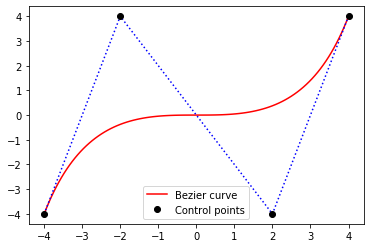

In [50]:
fig = plt.figure()

bzc, = plt.plot(x_ct,y_ct,'r',label='Bezier curve')
plt.plot(control_points_1[:,0],control_points_1[:,1],':b')
cp, = plt.plot(control_points_1[:,0],control_points_1[:,1],'ok',label='Control points')
plt.legend(handles = [bzc,cp])

plt.show()

###############################################################################################################################

In [ ]:
control_points_2 = np.asarray([[1,1],[2,4],[3,4],[3,1]]) # Another set of control points

In [51]:
t = np.linspace(0,1,100)
x_ct , y_ct = cubic_bezier_curve(control_points_2,t)

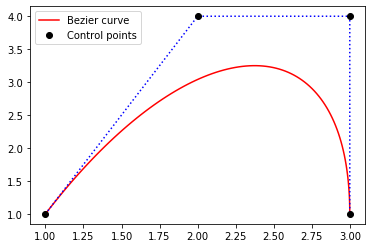

In [52]:
fig = plt.figure()

bzc, = plt.plot(x_ct,y_ct,'r',label='Bezier curve')
plt.plot(control_points_2[:,0],control_points_2[:,1],':b')
cp, = plt.plot(control_points_2[:,0],control_points_2[:,1],'ok',label='Control points')
plt.legend(handles = [bzc,cp])

plt.show()

###############################################################################################################################

In [7]:
control_points_s1 = np.array([[8,7],[4,6],[4,15],[10,12]])
control_points_s2 = np.array([[8,7],[12,8],[12,-1],[6,2]])

In [8]:
t = np.linspace(0,1,100)
x_ct , y_ct = cubic_bezier_curve(control_points_s1,t)
x_ct1 , y_ct1 = cubic_bezier_curve(control_points_s2,t)



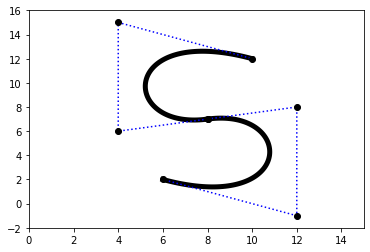

In [19]:
fig = plt.figure()
plt.plot(x_ct,y_ct,'k',label='Bezier curve',linewidth=5)
plt.plot(control_points_s1[:,0],control_points_s1[:,1],':b')
plt.plot(control_points_s1[:,0],control_points_s1[:,1],'ok',label='Control points')

plt.plot(x_ct1,y_ct1,'k',label='Bezier curve',linewidth=5)
plt.plot(control_points_s2[:,0],control_points_s2[:,1],':b')
plt.plot(control_points_s2[:,0],control_points_s2[:,1],'ok',label='Control points')
plt.axis([0 ,15 ,-2 ,16])
plt.show()

###############################################################################################################################

## A Closed Bezier curve can be defined by keeping the first and the last control point the same

In [59]:
control_points_3 = np.asarray([[1,1],[1,4],[2,4],[1,1]])

In [60]:
t = np.linspace(0,1,300)
x_ct , y_ct = cubic_bezier_curve(control_points_3,t)

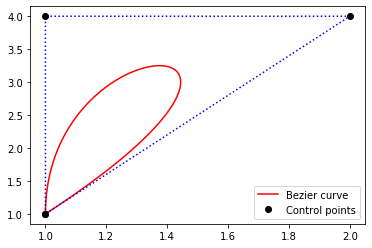

In [61]:
fig = plt.figure()

bzc, = plt.plot(x_ct,y_ct,'r',label='Bezier curve')
plt.plot(control_points_3[:,0],control_points_3[:,1],':b')
cp, = plt.plot(control_points_3[:,0],control_points_3[:,1],'ok',label='Control points')
plt.legend(handles = [bzc,cp])

plt.show()

# Examples for Bezier Surfaces.
* Here we will be looking at a cubic surface
* To define a cubic Bezier Surface we would need 16 control points in the 3D space. 
* The control points used here are the first surface defined in the Utah Teapot dataset

In [201]:
########################################## 2 D Bezier Curve
### 3 degree in x direction and 3 degree in the y direction.

val_u = np.linspace(0,1,15)
val_v = np.linspace(0,1,15)
cp_x = np.asarray([[[1.4, 1.4, 0.784,0],[1.3375,1.3375,0.749,0],[1.4375,1.4375,0.805,0],[1.5,1.5,0.84,0]]])
cp_y = np.asarray([[[0, -0.784, -1.4,-1.4],[0,-0.749,-1.3375,-1.3375],[0,-0.805,-1.4375,-1.4375],[0,-0.84,-1.5,-1.5]]])
cp_z = np.asarray([[[2.4, 2.4, 2.4,2.4],[2.5315,2.5315,2.5315,2.5315],[2.5315,2.5315,2.5315,2.5315],[2.4,2.4,2.4,2.4]]])


x_cord = []
y_cord = []
z_cord = []
print(cp_x.shape)

(1, 4, 4)


In [202]:
coeff_matrix = np.asarray([[-1,3,-3,1],[3,-6,3,0],[-3,3,0,0],[1,0,0,0]])

In [203]:
for i in val_u:
    u_mat = np.asarray([np.power(i,3),np.power(i,2),i,1])
    for j in val_v:        
        v_mat = np.asarray([[np.power(j,3)],[np.power(j,2)],[j],[1]])
        c_x = u_mat@coeff_matrix@cp_x@coeff_matrix@v_mat
        c_y = u_mat@coeff_matrix@cp_y@coeff_matrix@v_mat
        c_z = u_mat@coeff_matrix@cp_z@coeff_matrix@v_mat
        x_cord.append(c_x[0,0])
        y_cord.append(c_y[0,0])
        z_cord.append(c_z[0,0])
        

In [204]:
x_cord = np.asarray(x_cord)
y_cord = np.asarray(y_cord)
z_cord = np.asarray(z_cord)

In [205]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

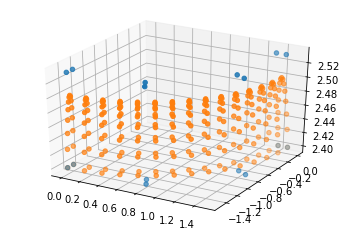

In [213]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(cp_x.T.reshape(-1,1)[:,0], cp_y.T.reshape(-1,1)[:,0], cp_z.T.reshape(-1,1)[:,0] , 'k')
ax.scatter(x_cord, y_cord, z_cord,'r')